In [1]:
# Import useful libraries
import numpy as np
import matplotlib.pyplot as plt

### Diffusion equation
\begin{eqnarray}
\frac{\partial f(x,t)}{\partial t}
&=&
D
\frac{\partial^2 f(x,t)}{\partial x^2} \, ,
\label{eq:DiffEq}
\end{eqnarray}

#### Initial condition:
$$
f(x,0) = \delta(x - x_0)
$$

#### Boundary condition:
$$
f\left(-\frac{L}{2},t\right) = f\left(+\frac{L}{2},t\right) 
$$

$$
J = \left. -D\frac{\partial f}{\partial x} \right\vert_{x = \pm \frac{L}{2}} = 0
$$


#### Solution 
\begin{eqnarray}
f(x,t) = \frac{1}{L} + \frac{2}{L} \sum_{n=1}^{\infty} \cos\left( \frac{2 n \pi x}{L} \right) 
\exp\left( - \frac{4\pi^2 n^2}{L^2}D t \right)
\label{eq:Gfunc}
\end{eqnarray}

#### Variance 
\begin{eqnarray}
\sigma^2(t) = \frac{L^{12}}{12} + \frac{L^{12}}{\pi^2} \sum_{n=1}^{\infty} \frac{(-1)^n}{n^2}
\exp\left( - \frac{4\pi^2 n^2}{L^2}D t \right)
\end{eqnarray}

In [2]:
# Length of the vessel
L = 1 # nm

# Diffusion constant
D  = 1 # nm2 ps-1

# Initial position
x0 = 0 # nm

def f(x,t):
    s = 0
    for n in range(1,100):
        s = s + np.cos( 2 * np.pi * n * x / L ) * np.exp( - D * (4 * np.pi**2 * n**2 / L**2 ) * t )
    return 1/L + 2/L*s

def sigma2(t):
    s = 0
    for n in np.arange(1,10):
        s = s + (-1)**n / n ** 2 * np.exp( - D * (4 * np.pi**2 * n**2 / L**2 ) * t )
        
    return L**2/12 + L**2/np.pi**2 * s

Integral over R:  1.0
Integral over R:  1.0
Integral over R:  1.0


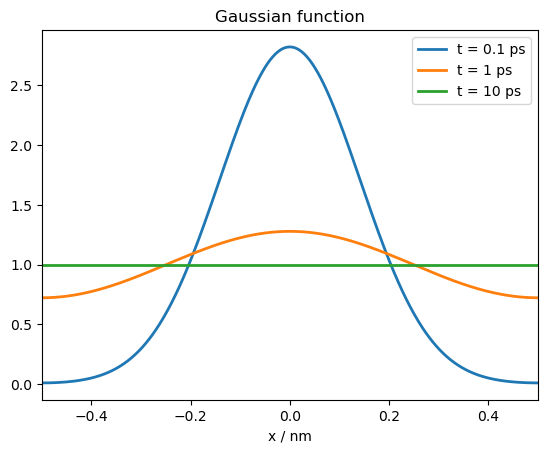

In [3]:
# Array of x values
xvalues = 1000
xmin  = -L/2
xmax  = - xmin
x     = np.linspace(xmin, xmax, xvalues)
dx    = x[1] - x[0]

# Time
t1     = 0.01 # ps
t2     = 0.05 # ps
t3     = 10 # ps

# Check normalization
N1     = np.trapz(f(x,t1), x)
N2     = np.trapz(f(x,t2), x)
N3     = np.trapz(f(x,t3), x)

print('Integral over R: ', str(N1))
print('Integral over R: ', str(N2))
print('Integral over R: ', str(N3))

# Figure
plt.plot(x, f(x,t1), linewidth = 2, label = 't = 0.1 ps')
plt.plot(x, f(x,t2), linewidth = 2, label = 't = 1 ps')
plt.plot(x, f(x,t3), linewidth = 2, label = 't = 10 ps')
plt.xlabel('x / nm')
plt.xlim((xmin, xmax))
plt.title('Gaussian function')
plt.legend();

In [4]:
# Number of simulations (replicas)
Nreps  = 10000

# Number of timesteps per each trajectory
Nsteps = 3000

# Timestep
dt = 0.001 # ps

X = np.zeros((Nsteps, Nreps))

# Assign initial condition
X[0,:] = x0

# sigma
sigma = np.sqrt(2 * D * dt)

# array for variance
v = np.zeros(Nsteps)

for n in range(Nsteps-1):
    X[n+1,:] = X[n,:] + sigma * np.random.normal(size=(1,Nreps))
    
    # Reflecting boundary conditions (mirror):
    X[n+1, X[n+1,:] > xmax] = 2 * xmax - X[n+1, X[n+1,:] > xmax]
    X[n+1, X[n+1,:] < xmin] = 2 * xmin - X[n+1, X[n+1,:] < xmin]
    v[n+1]                  = np.var(X[n+1,:])

Text(0.5, 1.0, 'Trajectories')

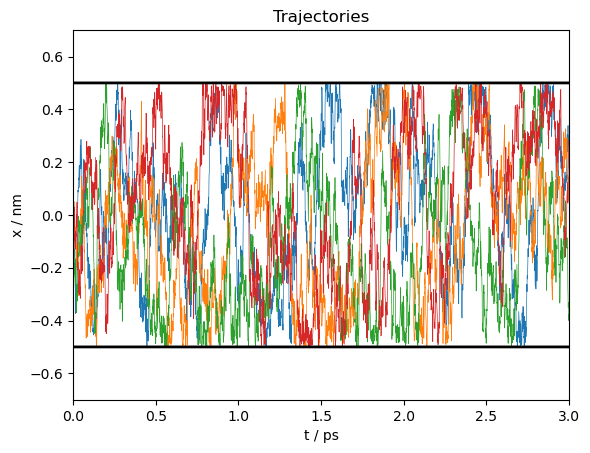

In [5]:
# Array of t values
tvalues = np.linspace(0, Nsteps, Nsteps)
tvalues = tvalues * dt

# Figure
plt.plot(tvalues, X[:,1:5], linewidth=0.5)
plt.plot(tvalues, 0.5*L*np.ones(Nsteps), 'k', linewidth=2)
plt.plot(tvalues, -0.5*L*np.ones(Nsteps), 'k', linewidth=2)

plt.xlabel('t / ps')
plt.ylabel('x / nm')
plt.xlim((0,Nsteps*dt))
plt.ylim((xmin-0.2, xmax+0.2))
plt.title('Trajectories')

In [6]:
# Build a histogram every 20 timesteps
xbins = 101
xaxis = np.linspace(xmin, xmax, xbins)


n0 = 1
t0 = n0 * dt
f0 = f(x,t0)
h  = np.histogram(X[n0,:], bins=xbins, range=(xmin, xmax), density=True)
h0 = h[0]

n1 = 5
t1 = n1 * dt
f1 = f(x,t1)
h  = np.histogram(X[n1,:], bins=xbins, range=(xmin, xmax), density=True)
h1 = h[0]

n2 = 10
t2 = n2 * dt
f2 = f(x,t2)
h  = np.histogram(X[n2,:], bins=xbins, range=(xmin, xmax), density=True)
h2 = h[0]

n3 = 15
t3 = n3 * dt
f3 = f(x,t3)
h  = np.histogram(X[n3,:], bins=xbins, range=(xmin, xmax), density=True)
h3 = h[0]

n4 = 900
t4 = n4 * dt
f4 = f(x,t4)
h  = np.histogram(X[n4,:], bins=xbins, range=(xmin, xmax), density=True)
h4 = h[0]



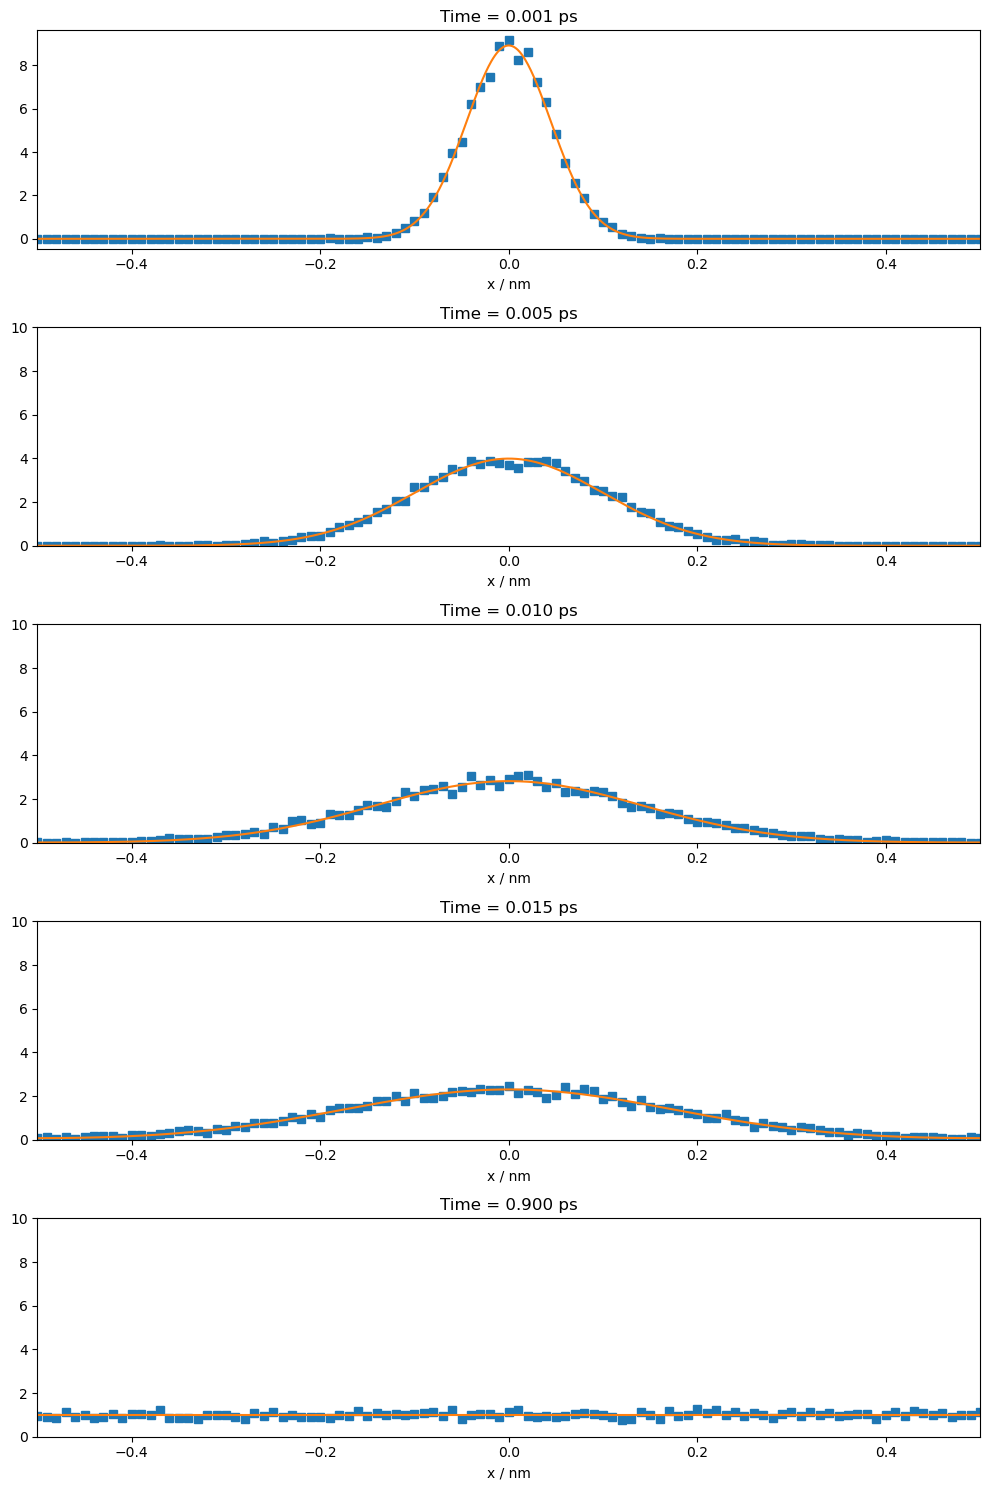

In [7]:
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(5, figsize=(10, 15))
ax0.plot(xaxis, h0,'s')
ax0.plot(x, f0)
ax0.set_xlabel('x / nm')
ax0.set_title('Time = %1.3f ps' %t0)
ax0.set_xlim((xmin, xmax))

ax1.plot(xaxis, h1,'s')
ax1.plot(x, f1)
ax1.set_xlabel('x / nm')
ax1.set_title('Time = %1.3f ps' %t1)
ax1.set_xlim((xmin, xmax))
ax1.set_ylim((0,10))

ax2.plot(xaxis, h2,'s')
ax2.plot(x, f2)
ax2.set_xlabel('x / nm')
ax2.set_title('Time = %1.3f ps' %t2)
ax2.set_xlim((xmin, xmax))
ax2.set_ylim((0, 10))

ax3.plot(xaxis, h3,'s')
ax3.plot(x, f3)
ax3.set_xlabel('x / nm')
ax3.set_title('Time = %1.3f ps' %t3)
ax3.set_xlim((xmin, xmax))
ax3.set_ylim((0, 10))

ax4.plot(xaxis, h4,'s')
ax4.plot(x, f4)
ax4.set_xlabel('x / nm')
ax4.set_title('Time = %1.3f ps' %t4)
ax4.set_xlim((xmin, xmax))
ax4.set_ylim((0, 10))

fig.tight_layout()

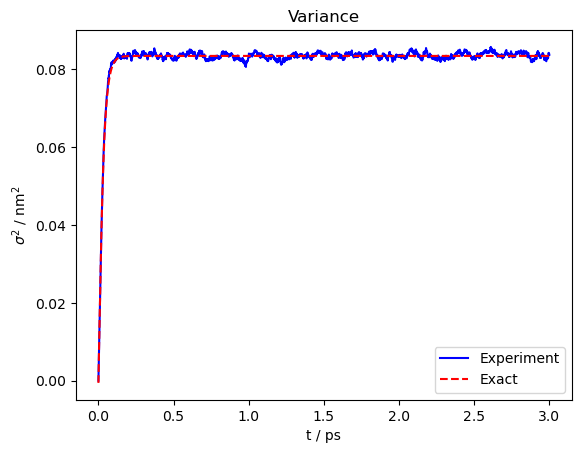

In [8]:
plt.plot(tvalues, v,                'b', label= 'Experiment')
plt.plot(tvalues, sigma2(tvalues), 'r--', label= 'Exact')
plt.xlabel('t / ps')
plt.ylabel(r'$\sigma^2$ / nm$^2$')
plt.title('Variance')
plt.legend()